Enrique Ulises Báez Gómez Tagle - 0241823

In [37]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [38]:
data = pd.read_csv('data.csv')

In [39]:
data_clean = data.dropna(subset=['nombre'])
data_transposed = data_clean.set_index('nombre').T
data_transposed.index = pd.to_datetime(data_transposed.index, errors='coerce', format='%d-%m-%Y')
data_transposed = data_transposed.dropna(how='all')

In [40]:
if not isinstance(data_transposed.index, pd.DatetimeIndex):
    data_transposed.index = pd.to_datetime(data_transposed.index, errors='coerce')

data_2020 = data_transposed[data_transposed.index.year == 2020]

In [41]:
scaler = StandardScaler()
data_2020_normalized = pd.DataFrame(scaler.fit_transform(data_2020), index=data_2020.index, columns=data_2020.columns)

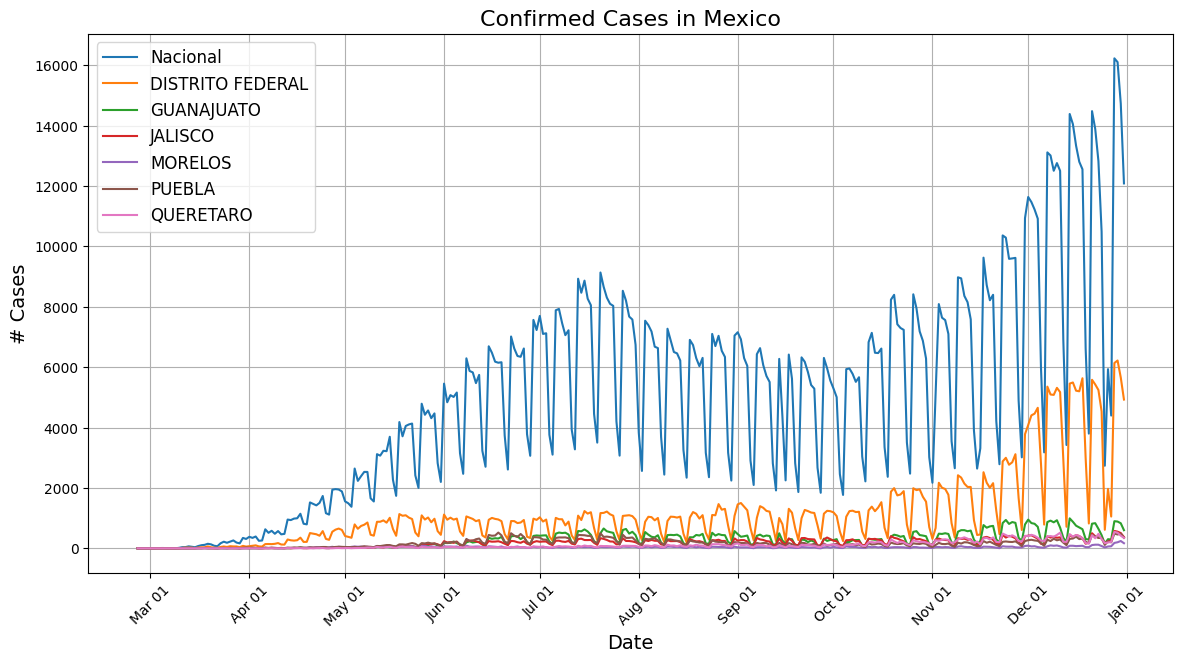

In [42]:
selected_states = ['Nacional', 'DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'MORELOS', 'PUEBLA', 'QUERETARO']

plt.figure(figsize=(14, 7))

for state in selected_states:
    plt.plot(data_2020.index, data_2020[state], label=state)

plt.title('Confirmed Cases in Mexico', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('# Cases', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.legend(fontsize=12)

plt.grid(True)
plt.show()

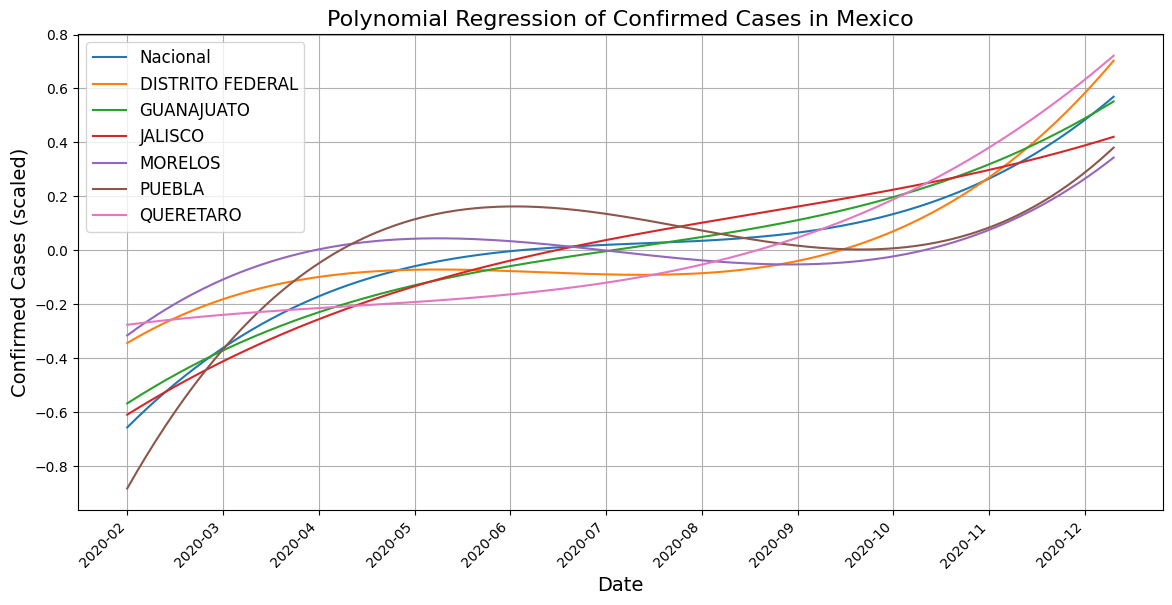

In [43]:
data_2020_scaled = data_2020_normalized / data_2020_normalized.abs().max()

df_poly = pd.DataFrame(index=data_2020_normalized.index)

plt.figure(figsize=(14, 7))

for state in selected_states:
    entity_cases = data_2020_scaled[state]
    ordinal_dates = data_2020_scaled.index.map(pd.Timestamp.toordinal)

    poly_fit = np.poly1d(np.polyfit(ordinal_dates, entity_cases.values, 3))

    df_poly[state] = poly_fit(ordinal_dates)

    plt.plot(data_2020_scaled.index, df_poly[state], label=state)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.xticks(ticks=data_2020_scaled.index[::30], labels=data_2020_scaled.index[::30].strftime('%Y-%m'), rotation=45)

plt.title('Polynomial Regression of Confirmed Cases in Mexico', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Cases (scaled)', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)
plt.show()

In [44]:
selected_states = ['DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'MORELOS', 'PUEBLA', 'QUERETARO']
df_poly2 = df_poly[selected_states]

In [45]:
scaler = StandardScaler()
df_poly2_scaled = scaler.fit_transform(df_poly2)

In [46]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_poly2_scaled)

In [47]:
pca_df = pd.DataFrame(data=pca_data, columns=['Comp 1', 'Comp 2', 'Comp 3'], index=df_poly2.index)

In [48]:
explained_variance = pca.explained_variance_ratio_

/var/folders/73/m50h3qv91_n45vnh3sfw1pb00000gq/T/ipykernel_55415/1821327136.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Comp 1', 'Comp 2', 'Comp 3'], y=explained_variance, palette='viridis')


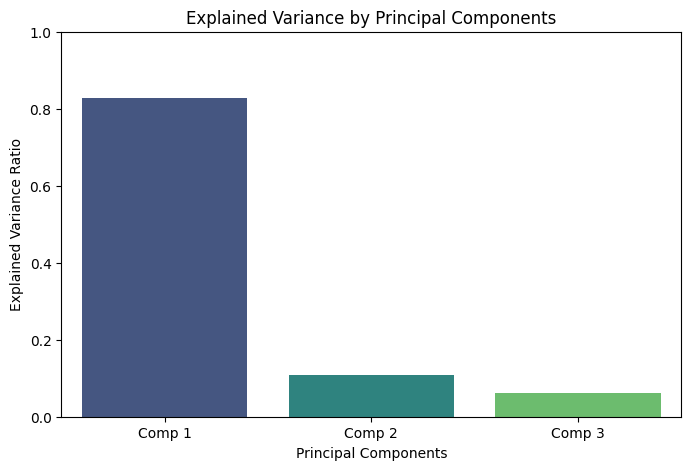

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Comp 1', 'Comp 2', 'Comp 3'], y=explained_variance, palette='viridis')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1)
plt.show()

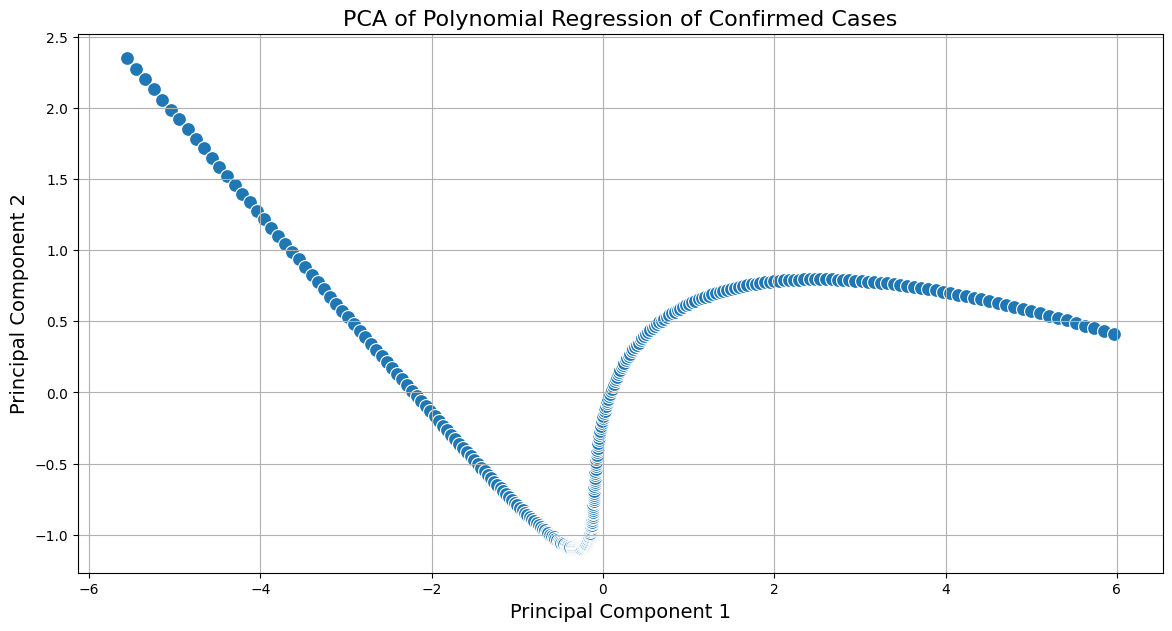

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

sns.scatterplot(data=pca_df, x='Comp 1', y='Comp 2', ax=ax, s=100)

ax.set_title('PCA of Polynomial Regression of Confirmed Cases', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)

plt.grid(True)
plt.show()

In [51]:
print(pca_df.head())

              Comp 1    Comp 2    Comp 3
2020-02-26 -5.554332  2.347556  0.088242
2020-02-27 -5.449767  2.273513  0.112479
2020-02-28 -5.346606  2.200338  0.135982
2020-02-29 -5.244664  2.128169  0.159003
2020-03-01 -5.144235  2.057070  0.181348


In [52]:
explained_variance_ratio = pca.explained_variance_ratio_

print('Explained Variance Ratio:')
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f'Component {i}: {ratio:.4f}')

components_df = pd.DataFrame(pca.components_, columns=df_poly2.columns, index=['Comp 1', 'Comp 2', 'Comp 3'])

print('\nPCA Components:')

import IPython.display as display
display.display(components_df)

Explained Variance Ratio:
Component 1: 0.8285
Component 2: 0.1095
Component 3: 0.0621

PCA Components:


,DISTRITO FEDERAL,GUANAJUATO,JALISCO,MORELOS,PUEBLA,QUERETARO
Comp 1,0.420626,0.437317,0.420551,0.398021,0.361521,0.407242
Comp 2,0.287750,0.118189,0.033822,-0.342616,-0.720469,0.515389
Comp 3,0.421436,-0.328395,-0.567859,0.603038,-0.159153,0.055678


In [53]:
max_component_state = components_df.idxmax(axis=1)

print('Most Contributing State for Each Component:')
for component, state in max_component_state.items():
    print(f'{component}: {state}')

Most Contributing State for Each Component:
Comp 1: GUANAJUATO
Comp 2: QUERETARO
Comp 3: MORELOS


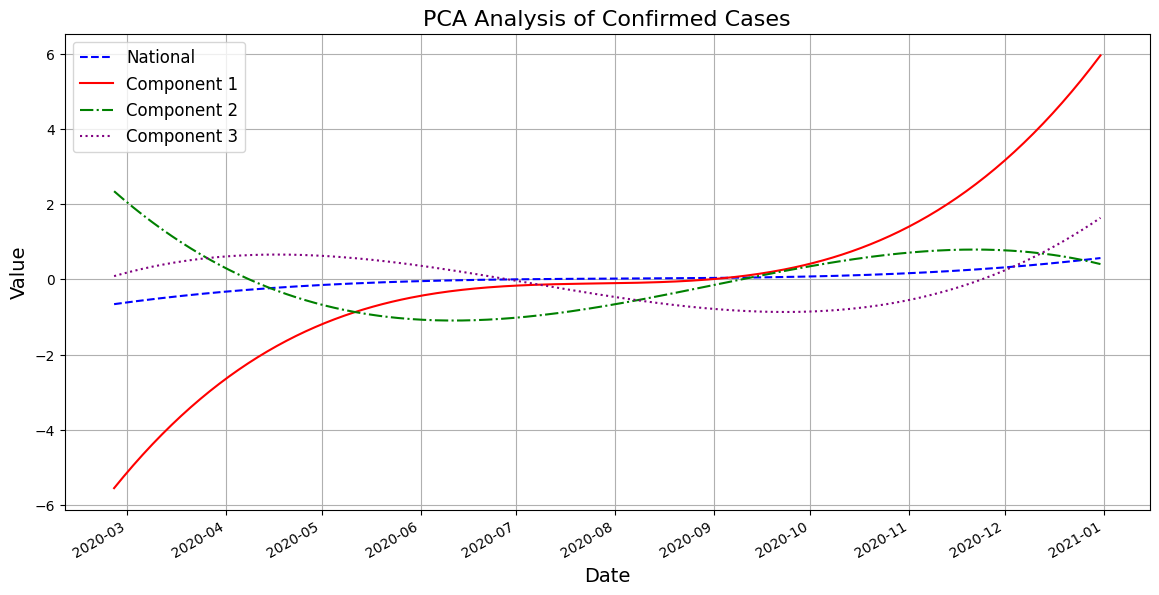

In [54]:
plt.figure(figsize=(14, 7))

plt.plot(df_poly.index, df_poly['Nacional'], label='National', linestyle='--', color='blue')

plt.plot(pca_df.index, pca_df['Comp 1'], label='Component 1', color='red', linestyle='-')
plt.plot(pca_df.index, pca_df['Comp 2'], label='Component 2', color='green', linestyle='-.')
plt.plot(pca_df.index, pca_df['Comp 3'], label='Component 3', color='purple', linestyle=':')

plt.title('PCA Analysis of Confirmed Cases', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.legend(fontsize=12)

plt.grid(True)
plt.show()

In [55]:
X = pca_df
y = df_poly['Nacional']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
tree_model = DecisionTreeRegressor(max_depth=3)

In [58]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [59]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

In [60]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = tree_model.score(X_train, y_train)
test_r2 = tree_model.score(X_test, y_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [61]:
print("{:<25} | {:<15} | {:<15}".format('Metric', 'Train', 'Test'))
print("-" * 60)
print("{:<25} | {:<15} | {:<15}".format('MSE', train_mse, test_mse))
print("{:<25} | {:<15} | {:<15}".format('RMSE', train_rmse, test_rmse))
print("{:<25} | {:<15} | {:<15}".format('R^2', train_r2, test_r2))
print("{:<25} | {:<15} | {:<15}".format('MAE', train_mae, test_mae))

Metric                    | Train           | Test           
------------------------------------------------------------
MSE                       | 0.0017579623980621272 | 0.0019372611423240538
RMSE                      | 0.04192806217871423 | 0.04401432882964426
R^2                       | 0.9702983873127843 | 0.9700837788882087
MAE                       | 0.035159842196511075 | 0.03635309038540646


In [62]:
train_results = pd.DataFrame(data={'Date': y_train.index, 'True': y_train, 'Predicted': y_train_pred}).sort_values('Date')
test_results = pd.DataFrame(data={'Date': y_test.index, 'True': y_test, 'Predicted': y_test_pred}).sort_values('Date')

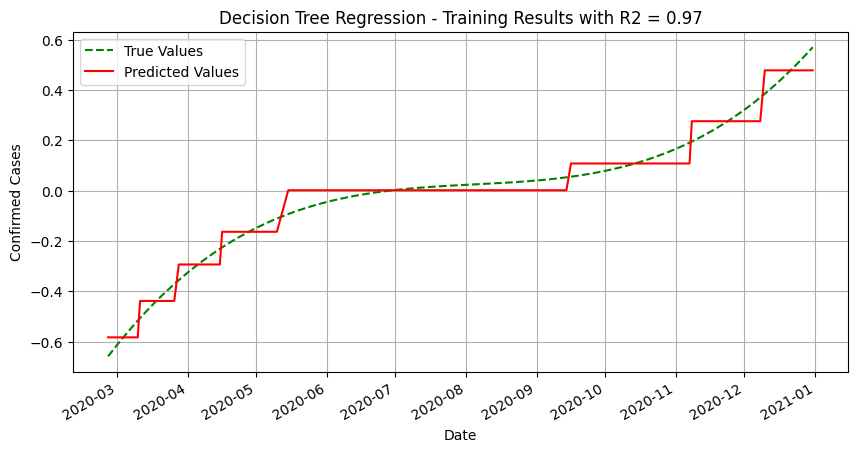

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(train_results['Date'], train_results['True'], label='True Values', linestyle='--', color='green')
plt.plot(train_results['Date'], train_results['Predicted'], label='Predicted Values', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(f'Decision Tree Regression - Training Results with R2 = {train_r2:.2f}')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

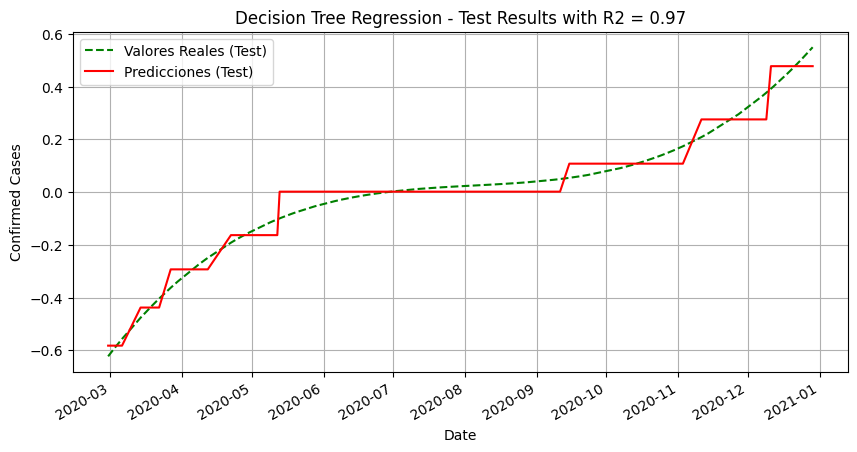

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(test_results['Date'], test_results['True'], label='Valores Reales (Test)', linestyle='--', color='green')
plt.plot(test_results['Date'], test_results['Predicted'], label='Predicciones (Test)', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title(f'Decision Tree Regression - Test Results with R2 = {test_r2:.2f}')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

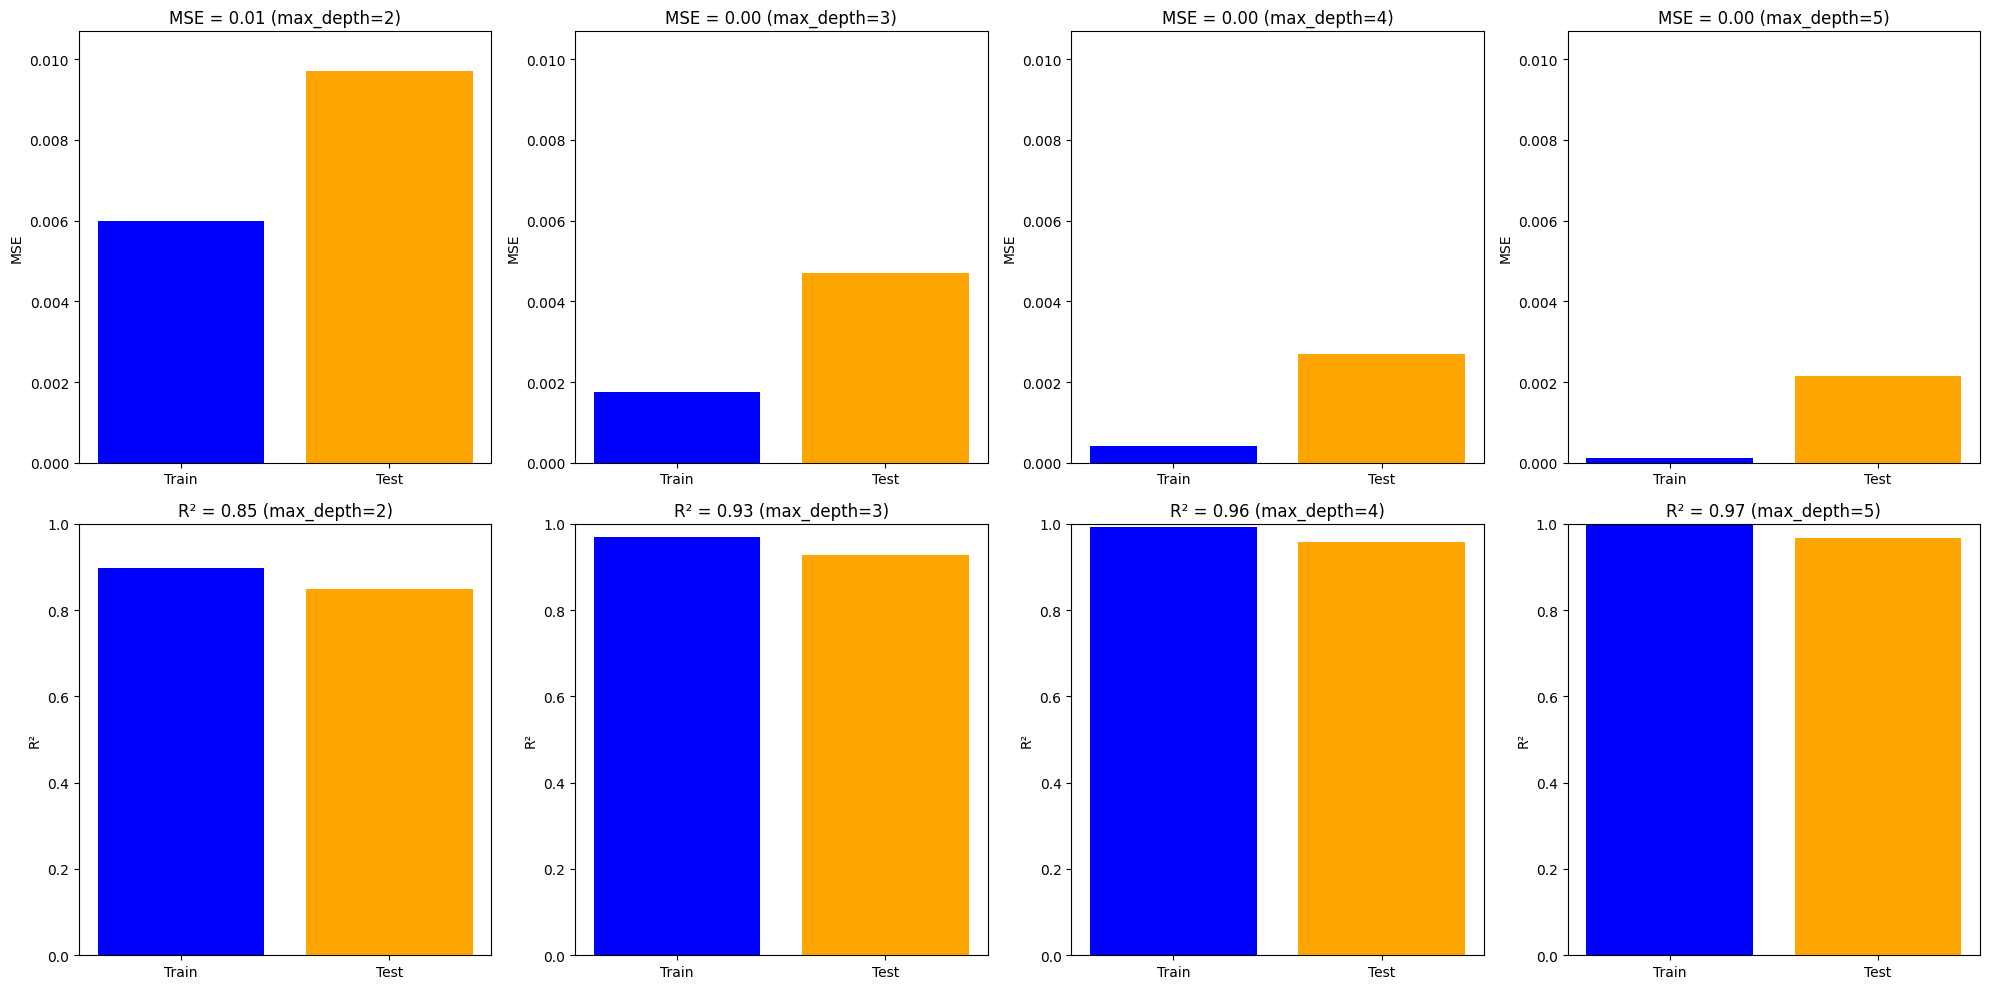

In [65]:
max_depths = [2, 3, 4, 5]

train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

max_mse = max(train_mse_list + test_mse_list)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, max_depth in enumerate(max_depths):
    axs[0, i].bar(['Train', 'Test'], [train_mse_list[i], test_mse_list[i]], color=['blue', 'orange'])
    axs[0, i].set_title(f'MSE = {test_mse_list[i]:.2f} (max_depth={max_depth})')
    axs[0, i].set_ylabel('MSE')
    axs[0, i].set_ylim(0, max_mse * 1.1)

for i, max_depth in enumerate(max_depths):
    axs[1, i].bar(['Train', 'Test'], [train_r2_list[i], test_r2_list[i]], color=['blue', 'orange'])
    axs[1, i].set_title(f'R² = {test_r2_list[i]:.2f} (max_depth={max_depth})')
    axs[1, i].set_ylabel('R²')
    axs[1, i].set_ylim(0, 1.0)

plt.tight_layout()
plt.show()

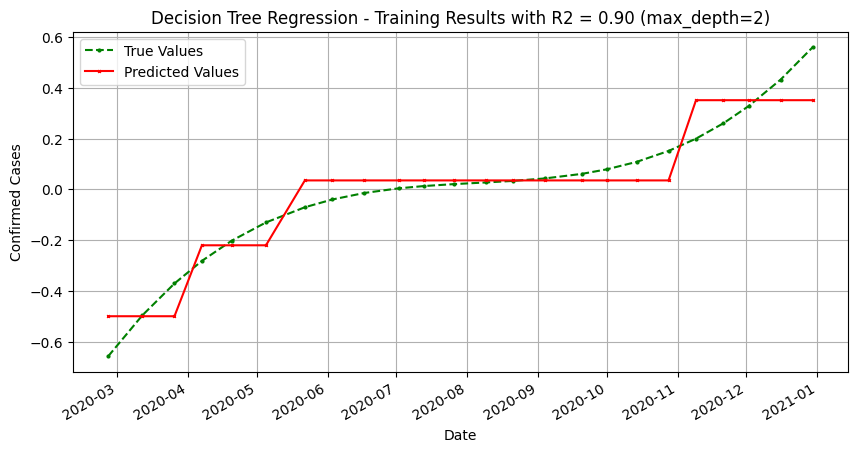

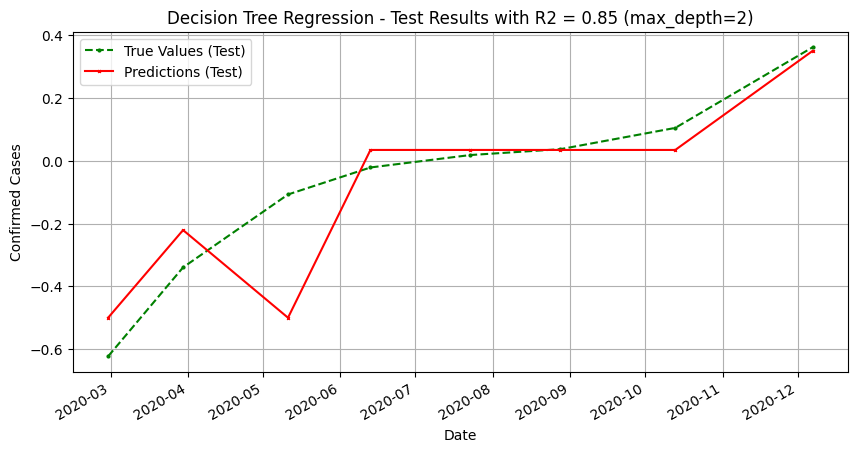

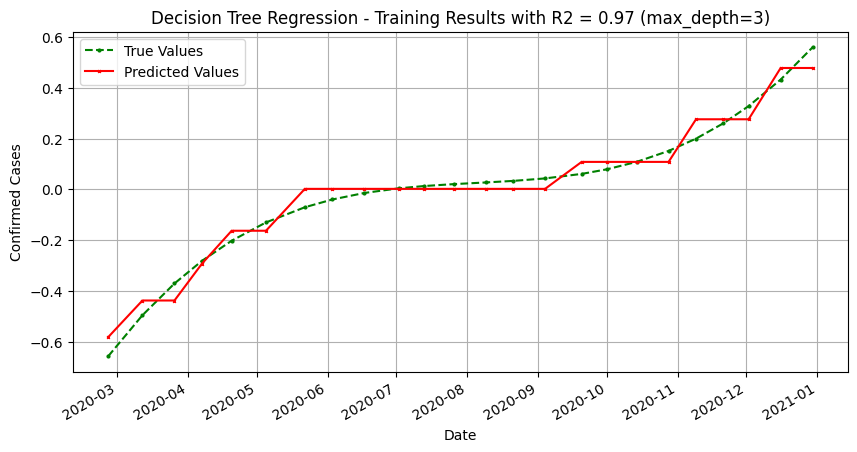

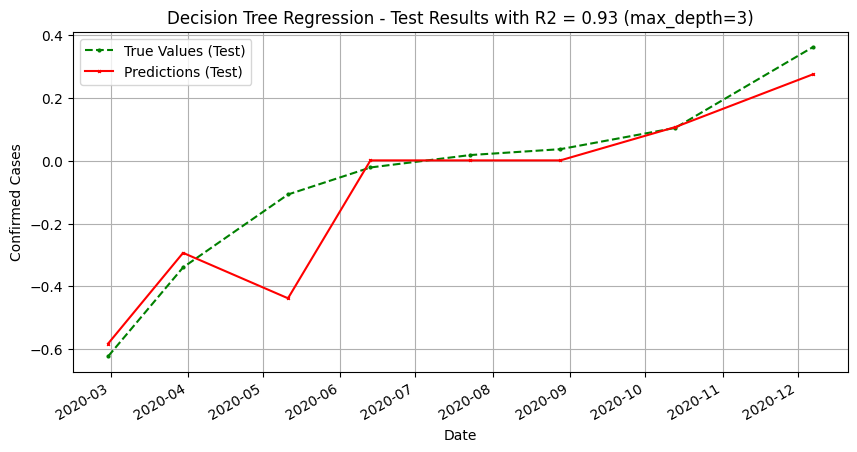

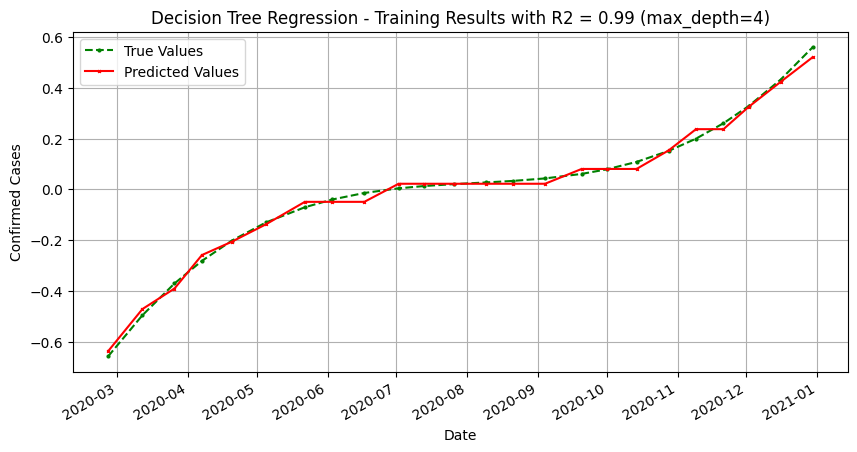

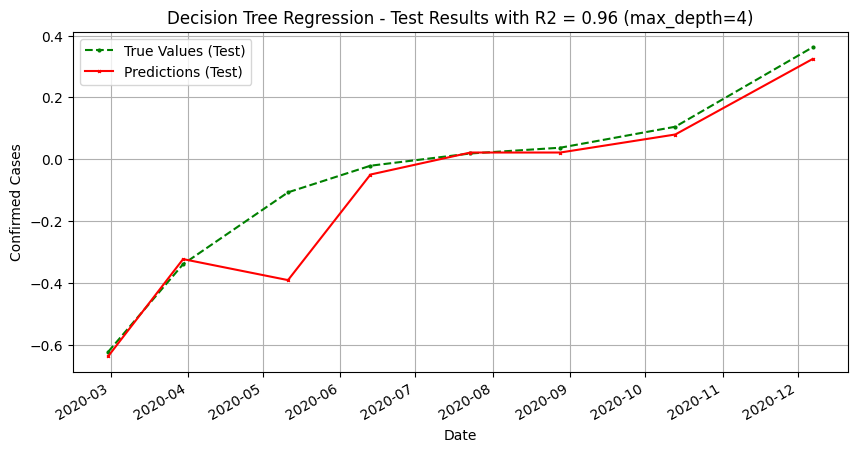

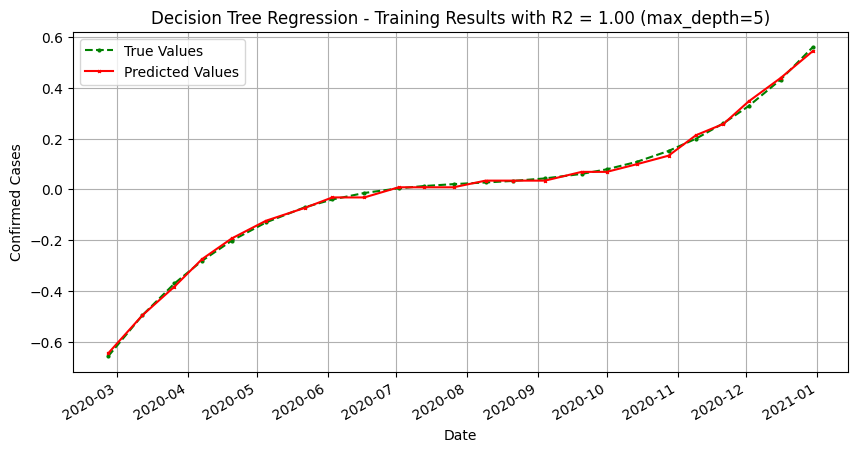

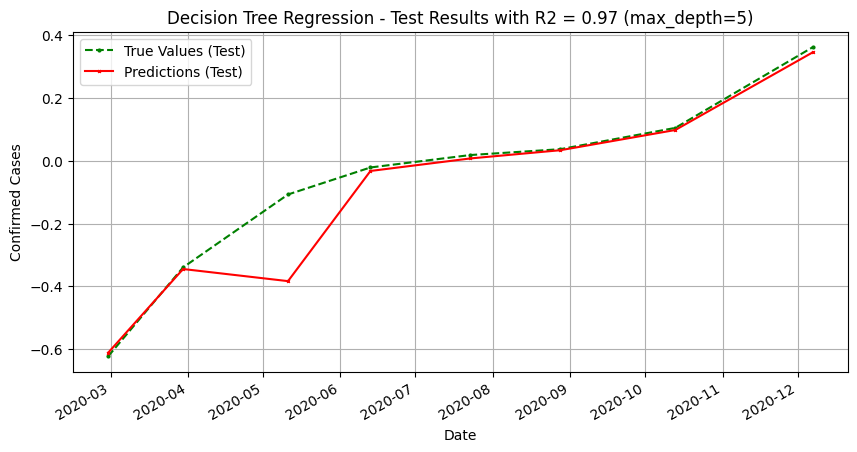

In [66]:
max_depths = [2, 3, 4, 5]

def plot_results(train_results, test_results, max_depth, train_r2, test_r2):
    plt.figure(figsize=(10, 5))
    
    plt.plot(train_results['Date'], train_results['True'], label='True Values', linestyle='--', color='green', marker='o', markersize=2)
    plt.plot(train_results['Date'], train_results['Predicted'], label='Predicted Values', linestyle='-', color='red', marker='x', markersize=2)
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title(f'Decision Tree Regression - Training Results with R2 = {train_r2:.2f} (max_depth={max_depth})')
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()

    plt.figure(figsize=(10, 5))
    
    plt.plot(test_results['Date'], test_results['True'], label='True Values (Test)', linestyle='--', color='green', marker='o', markersize=2)
    plt.plot(test_results['Date'], test_results['Predicted'], label='Predictions (Test)', linestyle='-', color='red', marker='x', markersize=2)
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title(f'Decision Tree Regression - Test Results with R2 = {test_r2:.2f} (max_depth={max_depth})')
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.show()

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    train_results = pd.DataFrame({
        'Date': X_train.index,
        'True': y_train,
        'Predicted': y_train_pred
    }).sort_values(by='Date')
    
    test_results = pd.DataFrame({
        'Date': X_test.index,
        'True': y_test,
        'Predicted': y_test_pred
    }).sort_values(by='Date')
    
    train_results_subset = train_results.iloc[::10, :]
    test_results_subset = test_results.iloc[::10, :]
    
    plot_results(train_results_subset, test_results_subset, max_depth, train_r2, test_r2)